In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

In [2]:
base_dir='../datasets/UTKFace/'

In [3]:
image_paths=[]
age_labels=[]
gender_labels=[]

for filename in tqdm(os.listdir(base_dir)):
    image_path=os.path.join(base_dir,filename)
    temp=filename.split('_')
    try:
        age=int(temp[0])
        gender=int(temp[1])
    except ValueError:
        print(filename)
    image_paths.append(image_path)
    age_labels.append(age)
    gender_labels.append(gender)

  0%|          | 0/23708 [00:00<?, ?it/s]

In [4]:
df=pd.DataFrame()
df['image'],df['age'],df['gender']=image_paths,age_labels,gender_labels

In [5]:
gender_dic={0:'Male',1:'Female'}

In [6]:
from sklearn.utils import shuffle
df = shuffle(df)

In [7]:
df.head()

,image,age,gender
9802,../datasets/UTKFace/60_0_3_20170119204312254.j...,60,0
22551,../datasets/UTKFace/14_1_0_20170109204620092.j...,14,1
5176,../datasets/UTKFace/46_0_3_20170119183130575.j...,46,0
19276,../datasets/UTKFace/35_1_2_20170116191713117.j...,35,1
10997,../datasets/UTKFace/38_1_0_20170116003418066.j...,38,1


In [8]:
df['gender'].unique()

array([0, 1])

In [9]:
df.head()

,image,age,gender
9802,../datasets/UTKFace/60_0_3_20170119204312254.j...,60,0
22551,../datasets/UTKFace/14_1_0_20170109204620092.j...,14,1
5176,../datasets/UTKFace/46_0_3_20170119183130575.j...,46,0
19276,../datasets/UTKFace/35_1_2_20170116191713117.j...,35,1
10997,../datasets/UTKFace/38_1_0_20170116003418066.j...,38,1


In [10]:
df['gender'] = df['gender'].replace({'Male': 0, 'Female': 1})

In [11]:
df.head()

,image,age,gender
9802,../datasets/UTKFace/60_0_3_20170119204312254.j...,60,0
22551,../datasets/UTKFace/14_1_0_20170109204620092.j...,14,1
5176,../datasets/UTKFace/46_0_3_20170119183130575.j...,46,0
19276,../datasets/UTKFace/35_1_2_20170116191713117.j...,35,1
10997,../datasets/UTKFace/38_1_0_20170116003418066.j...,38,1


In [26]:
df = df[df['age'] <= 60] # Constrain to 21-60 according to "Deep Ordinal Regression with Label Diversity"
df = df[df['age'] > 20]
df = df[:1000]

In [27]:
from PIL import Image
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image)
        img = img.resize((128, 128), Image.LANCZOS)
        img = np.array(img)
        features.append(img)    
    features = np.array(features)
    return features

In [28]:
X = extract_features(df['image'])

  0%|          | 0/1000 [00:00<?, ?it/s]

In [29]:
X.shape

(1000, 128, 128, 3)

In [30]:
X=X/255.0

In [31]:
y_age=np.array(df['age']) 
y_gender=np.array(df['gender'])

In [32]:
y_age

array([60, 46, 35, 38, 48, 24, 37, 46, 30, 60, 27, 21, 24, 26, 49, 26, 24,
       39, 26, 39, 36, 21, 28, 31, 26, 30, 26, 28, 38, 27, 26, 26, 52, 35,
       26, 52, 30, 28, 52, 58, 28, 32, 24, 27, 60, 32, 24, 30, 37, 60, 30,
       26, 36, 32, 47, 27, 52, 59, 57, 49, 40, 28, 45, 32, 45, 59, 26, 26,
       33, 58, 44, 29, 28, 26, 35, 31, 54, 40, 26, 26, 55, 23, 39, 28, 27,
       24, 54, 35, 26, 58, 28, 50, 30, 29, 30, 54, 36, 58, 34, 54, 56, 32,
       30, 45, 34, 46, 44, 51, 25, 60, 56, 24, 22, 26, 39, 38, 23, 40, 40,
       27, 23, 52, 35, 24, 29, 35, 46, 32, 35, 45, 37, 21, 26, 28, 43, 55,
       30, 36, 52, 40, 35, 45, 36, 53, 29, 52, 26, 54, 29, 35, 29, 55, 35,
       28, 24, 30, 32, 35, 35, 25, 35, 23, 30, 22, 26, 25, 52, 56, 26, 25,
       25, 25, 26, 37, 34, 31, 28, 31, 36, 35, 26, 50, 28, 25, 24, 29, 26,
       28, 58, 50, 26, 32, 26, 23, 26, 27, 31, 24, 50, 35, 24, 26, 26, 31,
       40, 35, 28, 26, 26, 35, 27, 30, 35, 25, 40, 45, 35, 36, 34, 26, 54,
       26, 40, 24, 34, 37

In [33]:
input_shape=(128,128,3)

In [34]:
inputs = Input((input_shape))
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu') (inputs)
maxp_1 = MaxPooling2D(pool_size=(2, 2)) (conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu') (maxp_1)
maxp_2 = MaxPooling2D(pool_size=(2, 2)) (conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu') (maxp_2)
maxp_3 = MaxPooling2D(pool_size=(2, 2)) (conv_3)
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu') (maxp_3)
maxp_4 = MaxPooling2D(pool_size=(2, 2)) (conv_4)

flatten = Flatten() (maxp_4)

# fully connected layers
dense_1 = Dense(256, activation='relu') (flatten)
dense_2 = Dense(256, activation='relu') (flatten)

dropout_1 = Dropout(0.4) (dense_1)
dropout_2 = Dropout(0.3) (dense_2)

# output_1 = Dense(1, activation='sigmoid', name='gender_out') (dropout_1)
output_2 = Dense(1, activation='relu', name='age_out') (dropout_2)
model = Model(inputs=[inputs], outputs=[output_2])

model.compile(loss=['mae'], optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001),
              metrics=['mae'])

In [36]:
history = model.fit(x=X, y=[y_age], batch_size=32, epochs=100, validation_split=0.2)

Epoch 1/100
25/25 [==============================] - 1s 32ms/step - loss: 8.9536 - mae: 8.9536 - val_loss: 8.7860 - val_mae: 8.7860
Epoch 2/100
25/25 [==============================] - 1s 29ms/step - loss: 8.9141 - mae: 8.9141 - val_loss: 9.0391 - val_mae: 9.0391
Epoch 3/100
25/25 [==============================] - 1s 30ms/step - loss: 8.9309 - mae: 8.9309 - val_loss: 8.7934 - val_mae: 8.7934
Epoch 4/100
25/25 [==============================] - 1s 28ms/step - loss: 8.9907 - mae: 8.9907 - val_loss: 8.5221 - val_mae: 8.5221
Epoch 5/100
25/25 [==============================] - 1s 26ms/step - loss: 8.6754 - mae: 8.6754 - val_loss: 8.4569 - val_mae: 8.4569
Epoch 6/100
25/25 [==============================] - 1s 26ms/step - loss: 8.5629 - mae: 8.5629 - val_loss: 8.7685 - val_mae: 8.7685
Epoch 7/100
25/25 [==============================] - 1s 28ms/step - loss: 8.3543 - mae: 8.3543 - val_loss: 8.4880 - val_mae: 8.4880
Epoch 8/100
25/25 [==============================] - 1s 29ms/step - loss: 8.

In [24]:
# acc = history.history['gender_out_accuracy']
# val_acc = history.history['val_gender_out_accuracy']
# epochs = range(len(acc))

# plt.plot(epochs, acc, 'b', label='Training Accuracy')
# plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
# plt.title('Accuracy Graph')
# plt.legend()
# plt.figure()

# loss = history.history['loss']
# val_loss = history.history['val_loss']

# plt.plot(epochs, loss, 'b', label='Training Loss')
# plt.plot(epochs, val_loss, 'r', label='Validation Loss')
# plt.title('Loss Graph')
# plt.legend()
# plt.show()

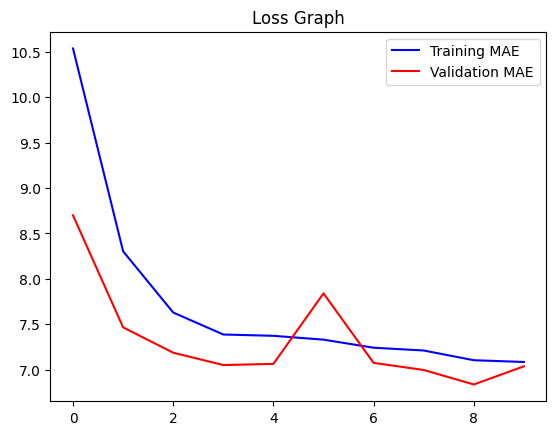

In [25]:
loss = history.history['mae']
val_loss = history.history['val_mae']
epochs = range(len(loss))

plt.plot(epochs, loss, 'b', label='Training MAE')
plt.plot(epochs, val_loss, 'r', label='Validation MAE')
plt.title('Loss Graph')
plt.legend()
plt.show()